## Daten aufbereiten und Modell bauen für Möhrenfliegen

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot

## Daten aufbereiten

In [184]:

df = pd.read_excel('/Users/philipprutimann/Documents/Open Farming Hackdays/pest_monitoring/Möhrenfliegendaten2006_2023.xlsx')
df_new=df[["datum","Mittelwert","Median"]].copy()
df_new["week"]=[x.date().isocalendar().week for x in list(df_new.datum)]
df_new["year"]=[x.date().isocalendar().year for x in list(df_new.datum)]
df_new["key"]=[str(str(x) + str(y)) for x,y in zip(list(df_new["year"]),list(df_new["week"]))]
df_new["key_1lag"]=[str(int(x)-1) for x in list(df_new["key"])]
df_new["key_2lag"]=[str(int(x)-2) for x in list(df_new["key"])]
df_new["class"]=[int(x>0) for x in list(df_new.Mittelwert)]
df_new.head()


,datum,Mittelwert,Median,week,year,key,key_1lag,key_2lag,class
0,2006-05-01,0.000000,0.0,18,2006,200618,200617,200616,0
1,2006-05-08,1.000000,0.0,19,2006,200619,200618,200617,1
2,2006-05-15,2.833333,4.0,20,2006,200620,200619,200618,1
3,2006-05-22,4.125000,3.5,21,2006,200621,200620,200619,1
4,2006-05-29,3.250000,3.5,22,2006,200622,200621,200620,1


In [190]:
df_new.groupby('class').count()/466


,datum,Mittelwert,Median,week,year,key,key_1lag,key_2lag
class,,,,,,,,
0,0.096567,0.096567,0.096567,0.096567,0.096567,0.096567,0.096567,0.096567
1,0.903433,0.903433,0.903433,0.903433,0.903433,0.903433,0.903433,0.903433


In [50]:
#df_wetter = pd.read_csv('/Users/philipprutimann/Documents/Open Farming Hackdays/Temperatur_Niederschlag_Muri.csv',sep=";", encoding='latin1')
df_wetter = pd.read_excel('/Users/philipprutimann/Documents/Open Farming Hackdays/pest_monitoring/Temperatur_Niederschlag_Muri_Days.ods')
df_wetter["datum1"]=pd.to_datetime(df_wetter.Datum)
df_wetter["datetime"]=[x.date() for x in list(df_wetter.datum1)]
df_wetter["week"]=[x.date().isocalendar().week for x in list(df_wetter.datum1)]
df_wetter["year"]=[x.date().isocalendar().year for x in list(df_wetter.datum1)]
#df_wetter["temp"]=pd.to_numeric(df_wetter['MURI - Temperatur Durchschnitt +2 m (Â°C)'], errors='ignore')
df_wetter["temp"]=df_wetter['MURI - Temperatur Durchschnitt +2 m (Â°C)']
#df_wetter["rain"]=pd.to_numeric(df_wetter['MURI - Niederschlag (mm oder Liter/m2)'], errors='ignore')
df_wetter["rain"]=df_wetter['MURI - Niederschlag (mm oder Liter/m2)']
df_wetter["key"]=[str(x) + str(y) for x,y in zip(list(df_wetter["year"]),list(df_wetter["week"]))]
df_wetter=df_wetter[['key','temp','rain']]
#df_wetter=df_wetter[['key','MURI - Niederschlag (mm oder Liter/m2)']]
df_wetter.head()



,key,temp,rain
0,200330,19.5,0.0
1,200330,23.5,0.0
2,200330,21.2,10.6
3,200331,17.8,0.0
4,200331,18.5,0.0


In [13]:
df_wohlen = pd.read_excel('/Users/philipprutimann/Documents/Open Farming Hackdays/pest_monitoring/Wetterdaten_Wohlen.xlsx')
df_wohlen["datum1"]=pd.to_datetime(df_wohlen.Datum)
df_wohlen["datetime"]=[x.date() for x in list(df_wohlen.datum1)]
df_wohlen["week"]=[x.date().isocalendar().week for x in list(df_wohlen.datum1)]
df_wohlen["year"]=[x.date().isocalendar().year for x in list(df_wohlen.datum1)]
df_wohlen["tempmax_wohlen"]=df_wohlen['Tmax (°C)']
df_wohlen["tempmin_wohlen"]=df_wohlen['Tmin (°C)']
df_wohlen["tempavg_wohlen"]=df_wohlen['Mittelwert Temp']
df_wohlen["rainsum_wohlen"]=df_wohlen['NStag (mm)']
df_wohlen["windavg_wohlen"]=df_wohlen['Wmax (km/h)']
df_wohlen["key"]=[str(x) + str(y) for x,y in zip(list(df_wohlen["year"]),list(df_wohlen["week"]))]
df_wohlen.head()

,Datum,Tmax (°C),Tmin (°C),Mittelwert Temp,NStag (mm),Wmax (km/h),datum1,datetime,week,year,tempmax_wohlen,tempmin_wohlen,tempavg_wohlen,rainsum_wohlen,windavg_wohlen,key
0,2006-04-10,10.985714,3.071429,7.028571,50.4,27.114286,2006-04-10,2006-04-10,15,2006,10.985714,3.071429,7.028571,50.4,27.114286,200615
1,2006-04-17,19.985714,5.285714,12.635714,5.9,39.985714,2006-04-17,2006-04-17,16,2006,19.985714,5.285714,12.635714,5.9,39.985714,200616
2,2006-04-24,16.500000,7.100000,11.800000,11.0,23.442857,2006-04-24,2006-04-24,17,2006,16.500000,7.100000,11.800000,11.0,23.442857,200617
3,2006-05-01,22.457143,7.014286,14.735714,9.1,19.528571,2006-05-01,2006-05-01,18,2006,22.457143,7.014286,14.735714,9.1,19.528571,200618
4,2006-05-08,18.785714,7.728571,13.257143,35.8,29.871429,2006-05-08,2006-05-08,19,2006,18.785714,7.728571,13.257143,35.8,29.871429,200619


In [14]:
#df_wetter.groupby(['key']).mean()
df_group_wetter=df_wetter.groupby("key").mean()
df_group_wetter= df_group_wetter.reset_index()
df_group_wetter["key_lag_1week"]=[str(int(x)-1) for x in list(df_group_wetter["key"])]
df_group_wetter.head()

,key,temp,rain,key_lag_1week
0,200330,21.400000,3.533333,200329
1,200331,19.914286,0.314286,200330
2,200332,26.314286,0.000000,200331
3,200333,24.371429,2.457143,200332
4,200334,21.142857,0.085714,200333


In [171]:
df_boden_in = pd.read_excel('Temp_Boden.xlsx')
df_boden=df_boden_in.copy()
df_boden["soiltemp_sum"]=df_boden['GradSummeKW']
df_boden["soiltemp_avg"]=df_boden['GRAENICHEN - Temperatur Durchschnitt -10 cm (°C)']
df_boden["datum1"]=pd.to_datetime(df_boden.Datum)
df_boden["datetime"]=[x.date() for x in list(df_boden.datum1)]
df_boden["week"]=[x.date().isocalendar().week for x in list(df_boden.datum1)]
df_boden["year"]=[x.date().isocalendar().year for x in list(df_boden.datum1)]
df_boden["key"]=[str(x) + str(y) for x,y in zip(list(df_boden["year"]),list(df_boden["week"]))]
df_boden.head()

,Datum,KW,GRAENICHEN - Temperatur Durchschnitt -10 cm (°C),GradSummeKW,soiltemp_sum,soiltemp_avg,datum1,datetime,week,year,key
0,2006-03-06,10,1.985714,13.9,13.9,1.985714,2006-03-06,2006-03-06,10,2006,200610
1,2006-03-13,11,1.328571,9.3,9.3,1.328571,2006-03-13,2006-03-13,11,2006,200611
2,2006-03-20,12,7.014286,49.1,49.1,7.014286,2006-03-20,2006-03-20,12,2006,200612
3,2006-03-27,13,9.485714,66.4,66.4,9.485714,2006-03-27,2006-03-27,13,2006,200613
4,2006-04-03,14,7.057143,49.4,49.4,7.057143,2006-04-03,2006-04-03,14,2006,200614


In [156]:
df_boden

,Datum,KW,GRAENICHEN - Temperatur Durchschnitt -10 cm (°C),GradSummeKW,datum1,datetime
0,2006-03-06,10.0,1.985714,13.9,2006-04-10,2006-04-10
1,2006-03-13,11.0,1.328571,9.3,2006-04-17,2006-04-17
2,2006-03-20,12.0,7.014286,49.1,2006-04-24,2006-04-24
3,2006-03-27,13.0,9.485714,66.4,2006-05-01,2006-05-01
4,2006-04-03,14.0,7.057143,49.4,2006-05-08,2006-05-08
...,...,...,...,...,...,...
938,2024-02-19,8.0,6.728571,47.1,NaT,NaT
939,2024-02-26,9.0,6.914286,48.4,NaT,NaT
940,2024-03-04,10.0,6.500000,45.5,NaT,NaT
941,2024-03-11,11.0,8.300000,58.1,NaT,NaT


In [185]:
df_lag=df_new[['key','Mittelwert']].copy()
df_total=pd.merge(df_new, df_lag, how="left",  left_on='key_1lag', right_on='key')
df_total=pd.merge(df_total, df_wohlen, how="left", left_on='key_x', right_on='key')
df_total=pd.merge(df_total, df_boden, how="left", left_on='key_x', right_on='key',suffixes=('', '_zz'))
df_total["trend"] = range(1,467)
df_total.head()

,datum,Mittelwert_x,Median,week_x,year_x,key_x,key_1lag,key_2lag,class,key_y,...,GRAENICHEN - Temperatur Durchschnitt -10 cm (°C),GradSummeKW,soiltemp_sum,soiltemp_avg,datum1_zz,datetime_zz,week,year,key_zz,trend
0,2006-05-01,0.000000,0.0,18,2006,200618,200617,200616,0,NaN,...,12.471429,87.3,87.3,12.471429,2006-05-01,2006-05-01,18,2006,200618,1
1,2006-05-08,1.000000,0.0,19,2006,200619,200618,200617,1,200618,...,13.442857,94.1,94.1,13.442857,2006-05-08,2006-05-08,19,2006,200619,2
2,2006-05-15,2.833333,4.0,20,2006,200620,200619,200618,1,200619,...,15.700000,109.9,109.9,15.700000,2006-05-15,2006-05-15,20,2006,200620,3
3,2006-05-22,4.125000,3.5,21,2006,200621,200620,200619,1,200620,...,15.400000,107.8,107.8,15.400000,2006-05-22,2006-05-22,21,2006,200621,4
4,2006-05-29,3.250000,3.5,22,2006,200622,200621,200620,1,200621,...,12.557143,87.9,87.9,12.557143,2006-05-29,2006-05-29,22,2006,200622,5


## Daten Beschreiben und Visualisieren

In [188]:
df_total.describe()

,datum,Mittelwert_x,Median,week_x,year_x,class,Mittelwert_y,Datum,Tmax (°C),Tmin (°C),...,Datum_zz,KW,GRAENICHEN - Temperatur Durchschnitt -10 cm (°C),GradSummeKW,soiltemp_sum,soiltemp_avg,datum1_zz,week,year,trend
count,466,466.000000,466.000000,466.000000,466.000000,466.000000,445.000000,466,466.000000,466.000000,...,466,466.000000,466.000000,466.000000,466.000000,466.000000,466,466.000000,466.000000,466.000000
mean,2015-07-07 11:10:33.476394752,1.322140,0.612266,29.384120,2014.967811,0.903433,1.357494,2015-07-07 07:00:15.450643712,22.881637,11.359289,...,2015-07-07 07:00:15.450643712,29.660944,17.923297,125.393133,125.393133,17.923297,2015-07-07 07:00:15.450643712,29.384120,2014.967811,233.500000
min,2006-05-01 00:00:00,0.000000,0.000000,14.000000,2006.000000,0.000000,0.000000,2006-05-01 00:00:00,9.742857,0.628571,...,2006-05-01 00:00:00,14.000000,6.828571,37.900000,37.900000,6.828571,2006-05-01 00:00:00,14.000000,2006.000000,1.000000
25%,2010-09-21 18:00:00,0.175000,0.000000,23.000000,2010.000000,1.000000,0.175000,2010-09-21 18:00:00,19.646429,8.664286,...,2010-09-21 18:00:00,23.000000,14.996429,104.750000,104.750000,14.996429,2010-09-21 18:00:00,23.000000,2010.000000,117.250000
50%,2015-08-14 12:00:00,0.500000,0.000000,29.000000,2015.000000,1.000000,0.500000,2015-08-13 12:00:00,23.035714,11.892857,...,2015-08-13 12:00:00,30.000000,18.242857,127.700000,127.700000,18.242857,2015-08-13 12:00:00,29.000000,2015.000000,233.500000
75%,2020-05-16 06:00:00,1.284722,0.638021,36.000000,2020.000000,1.000000,1.300000,2020-05-16 06:00:00,26.435714,14.078571,...,2020-05-16 06:00:00,36.000000,21.000000,147.000000,147.000000,21.000000,2020-05-16 06:00:00,36.000000,2020.000000,349.750000
max,2023-10-30 00:00:00,23.668750,10.000000,45.000000,2023.000000,1.000000,23.668750,2023-10-30 00:00:00,35.442857,18.171429,...,2023-10-30 00:00:00,45.000000,27.300000,191.100000,191.100000,27.300000,2023-10-30 00:00:00,45.000000,2023.000000,466.000000
std,NaN,2.604787,1.194525,7.694746,5.274919,0.295684,2.656042,NaN,4.853749,3.532394,...,NaN,7.684145,4.065042,28.562649,28.562649,4.065042,NaN,7.694746,5.274919,134.666873


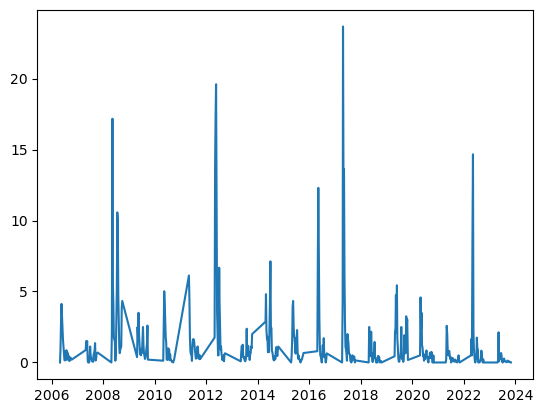

In [135]:
pyplot.plot('datum', 'Mittelwert_x', data=df_total)

In [136]:
year2006=df_total[['week_x','Mittelwert_x']][df_total.year_x==2006]
year2023=df_total[['week_x','Mittelwert_x']][df_total.year_x==2023]




In [ ]:
fig, ax = pyplot.subplots()
ax.plot(activity, , label="2006")
ax.plot(activity, cat, label="2023")
ax.legend()

pyplot.show()

## Model bauen und testen

In [96]:
df_total.shape

(466, 29)

In [176]:

df_total_train = df_total[1:401]
df_total_test = df_total[401:466]
Xtrain = np.array(df_total_train[['tempmax_wohlen','tempmin_wohlen','tempavg_wohlen','rainsum_wohlen','windavg_wohlen','trend','week_x','soiltemp_sum','soiltemp_avg']])
Ytrain = np.array(df_total_train['Mittelwert_x'])
Xtest = np.array(df_total_test[['tempmax_wohlen','tempmin_wohlen','tempavg_wohlen','rainsum_wohlen','windavg_wohlen','trend','week_x','soiltemp_sum','soiltemp_avg']])
Ytest = np.array(df_total_test['Mittelwert_x'])

In [178]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=1000)
clf = clf.fit(Xtrain, Ytrain)

In [179]:
from sklearn.metrics import mean_squared_error, explained_variance_score
Ypredict=clf.predict(Xtest)
df_zz=pd.DataFrame(Ypredict)
df_total_predict=df_total_test.copy()
df_total_predict = pd.concat([df_total_predict, df_zz], ignore_index=True, axis=0)
print(f'Standartfehler: {mean_squared_error(Ytest,Ypredict)}')
print(f'Erklährte Variabilität: {explained_variance_score(Ytest, Ypredict, force_finite=False)}')

Standartfehler: 3.778819975215017
Erklährte Variabilität: 0.1894100378221819


In [181]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

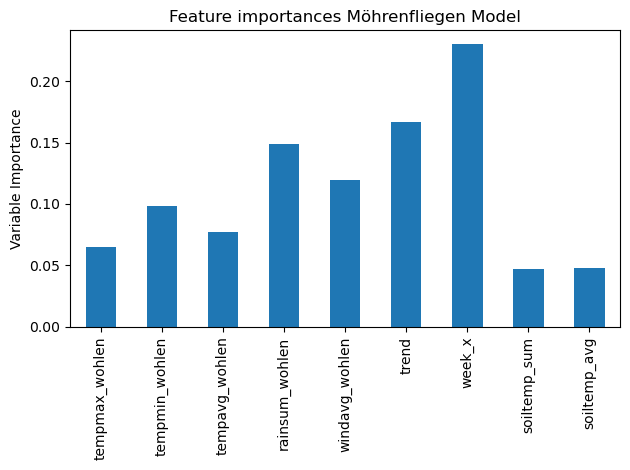

In [183]:
feature_names=df_total_train[['tempmax_wohlen','tempmin_wohlen','tempavg_wohlen','rainsum_wohlen','windavg_wohlen','trend','week_x','soiltemp_sum','soiltemp_avg']].columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = pyplot.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances Möhrenfliegen Model")
ax.set_ylabel("Variable Importance")
fig.tight_layout()

In [46]:
Ypredict


array([0.35917162, 1.37115133, 1.54747021, 0.77855903, 1.09762784,
       1.46727885, 1.39670283, 1.51465617, 2.50865118, 3.02291432,
       3.88453495, 3.54661153, 2.33462188, 0.70371418, 0.47823662,
       0.55733704, 0.33121755, 0.39123736, 0.37039651, 0.55448407,
       0.41887304, 0.40545729, 0.2413802 , 0.19249819, 0.11893742,
       0.17829262, 0.24173511, 0.19843314, 0.28753812, 0.67086396,
       0.47267521, 0.30305515, 0.55924201, 0.94541918, 0.31957026,
       3.78995324, 1.88570754, 1.40115162, 1.41841121, 2.58367882,
       2.54988739, 2.1213039 , 2.89324193, 2.62271747, 0.96109829,
       1.35847739, 0.59653958, 0.40564582, 0.29341414, 1.21199153,
       0.47927947, 0.6429325 , 0.66153129, 0.25771135, 0.26759894,
       0.16266021, 0.26659878, 0.28372807, 0.803091  , 0.64618159,
       0.49833734, 0.48681448, 0.29659469, 0.16984805, 0.66986653,
       1.79253702])

In [141]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "pest_möhrenfliege_model.pkl"  

with open(f'/Users/philipprutimann/Documents/Open Farming Hackdays/pest_monitoring/{model_pkl_file}', 'wb') as file:  
    pickle.dump(clf, file)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor().fit(Xtrain, Ytrain)
Ypredict_boost=est.predict(Xtest)
est.score(Xtest, Ytest)
print(f'Standartfehler: {mean_squared_error(Ytest,Ypredict_boost)}')
print(f'Erklährte Variabilität: {explained_variance_score(Ytest, Ypredict_boost, force_finite=False)}')

Standartfehler: 4.14016947671663
Erklährte Variabilität: 0.06960481212792036


In [186]:
from sklearn.ensemble import RandomForestClassifier
df_total_train = df_total[1:401]
df_total_test = df_total[401:466]
Xtrain = np.array(df_total_train[['tempmax_wohlen','tempmin_wohlen','tempavg_wohlen','rainsum_wohlen','windavg_wohlen','trend','week_x','soiltemp_sum','soiltemp_avg']])
Ytrain = np.array(df_total_train['class'])
Xtest = np.array(df_total_test[['tempmax_wohlen','tempmin_wohlen','tempavg_wohlen','rainsum_wohlen','windavg_wohlen','trend','week_x','soiltemp_sum','soiltemp_avg']])
Ytest = np.array(df_total_test['class'])
clf = RandomForestClassifier(n_estimators=1000)
clf = clf.fit(Xtrain, Ytrain)

In [187]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
Ypredict=clf.predict(Xtest)
print(f'Standartfehler: {accuracy_score(Ytest,Ypredict)}')
print(f'Erklährte Variabilität: {balanced_accuracy_score(Ytest, Ypredict)}')

Standartfehler: 0.7230769230769231
Erklährte Variabilität: 0.5637755102040816
